### Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd import Function
import torch.optim as optim
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Create MLP

In [2]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 2),
            nn.ReLU(),
            nn.Linear(2, 1)
        )        
    def forward(self, x):
        y_pred = self.layers(x)
        return y_pred

### Instantiate Model, Criterion, and Optimizer

In [3]:
model = MLP()

def criterion(out, label):
    return (label - out) ** 2

optimizer = optim.Adam(model.parameters(), lr=1e-1)

### Create Dataset

In [4]:
# xor data set
data = torch.randn(4,2)
data[0,0] = 0; data[0,1] = 0;
data[1,0] = 1; data[1,1] = 1;
data[2,0] = 0; data[2,1] = 1;
data[3,0] = 1; data[3,1] = 0;

L = torch.randn(4)
L[0] = 0; L[1] = 0
L[2] = 1; L[3] = 1

### Perform Experiment

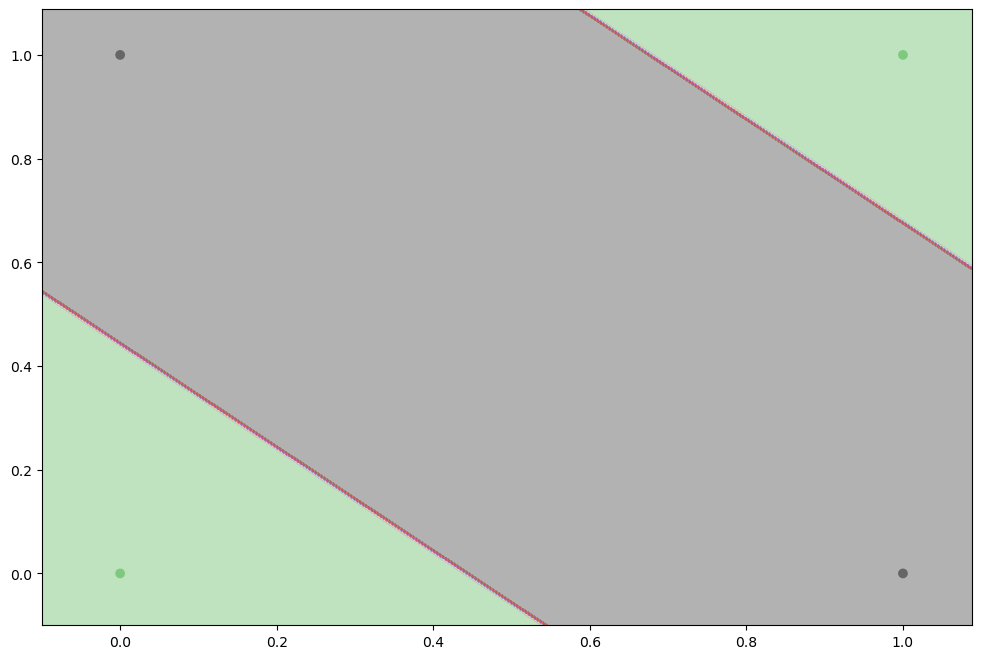

In [5]:
for epoch in range(2000):
    for i in range(4):
        X = Variable(data[i,:])
        Y = Variable(L[i])
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

x_min, x_max = data[:, 0].min()-0.1, data[:, 0].max()+0.1
y_min, y_max = data[:, 1].min()-0.1, data[:, 1].max()+0.1
spacing = min(x_max - x_min, y_max - y_min) / 100
XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
               np.arange(y_min, y_max, spacing))
datax = np.hstack((XX.ravel().reshape(-1,1), 
                  YY.ravel().reshape(-1,1)))
data_t = torch.FloatTensor(datax)
db_prob = model(data_t)
clf = np.where(db_prob<0.5,0,1)
Z = clf.reshape(XX.shape)
plt.figure(figsize=(12,8))
plt.contourf(XX, YY, Z, cmap=plt.cm.Accent, alpha=0.5)
plt.scatter(data[:,0], data[:,1], c=L, cmap=plt.cm.Accent)
plt.show()